In [1]:
import numpy as np
import matplotlib.pyplot as plt
from dataclasses import dataclass

In [2]:
# Cryptarchia lottery function

def phi(f, alpha):
    return 1 - (1-f)**alpha

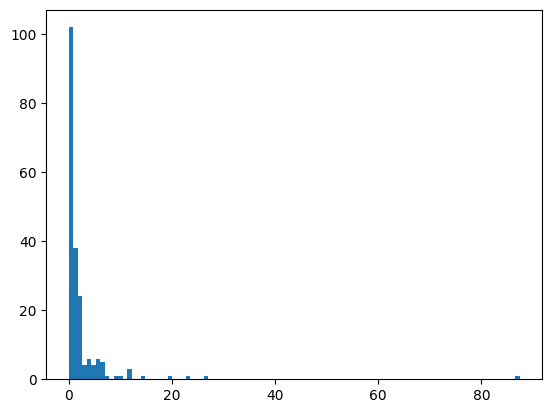

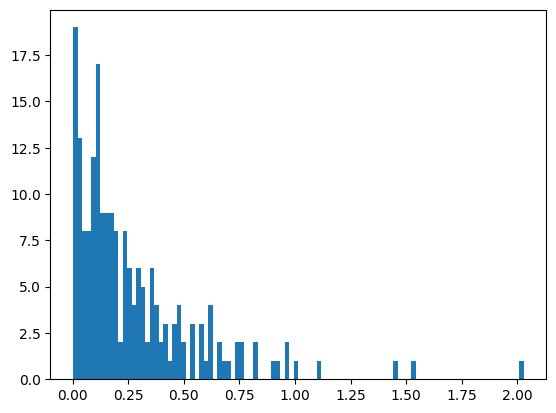

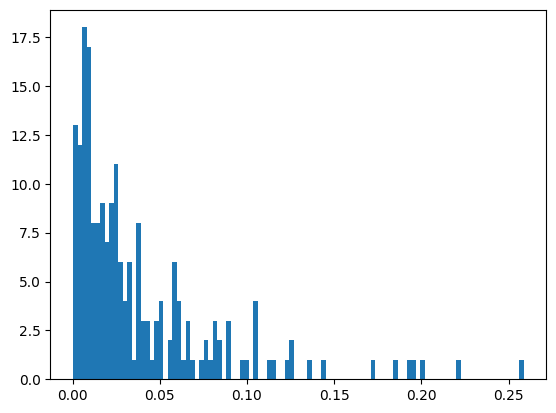

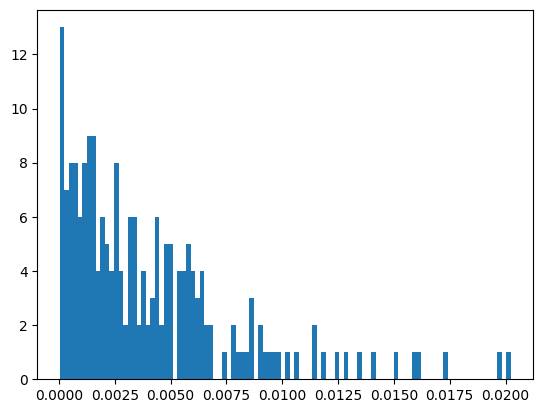

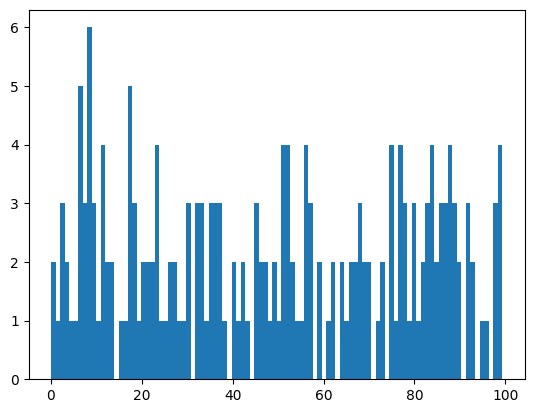

In [3]:
# Generate stake distribution
total_notes = 200

stake = []
for i in range(1, 5):
    stake.append(np.random.pareto(i ** i, total_notes))
    _ = plt.hist(stake[i-1], bins=100)
    plt.show()
stake.append(np.random.uniform(0, 100, total_notes))
_ = plt.hist(stake[4], bins=100)
plt.show()

In [4]:
# True Total Stake
true_stake = np.array(stake).sum(axis=1)
true_stake

array([4.89134678e+02, 5.43454109e+01, 7.73172289e+00, 8.09702500e-01,
       9.74495241e+03])

In [5]:
f = 1/30 # occupancy rate
T = int(10 * 2160 / f) # epoch length, 10k/f

In [6]:
epochs = 50
D_values = []

for j in range(0, 5):
    D_values_j = []
    
    # Initial stake estimate 
    D_ell = true_stake[j] * 0.75
    for i in range(0, epochs):
    
        # Running one epoch of the cryptarchia lottery
        alpha = stake[j] / D_ell
        p_lottery = phi(f, alpha)
        wins = np.random.uniform(0, 1, (T, len(stake[j]))) < p_lottery
    
        # Total Stake Inference
        empirical_slot_activation_rate = (wins.sum(axis=1) != 0).sum() / T
        error = f - empirical_slot_activation_rate
    
        # Learning coefficient
        beta = 0.8
        h = beta * (D_ell / f)
    
        # New total stake estimate
        D_ell = D_ell - h * error
        D_values_j.append(D_ell)
            
    D_values.append(D_values_j)

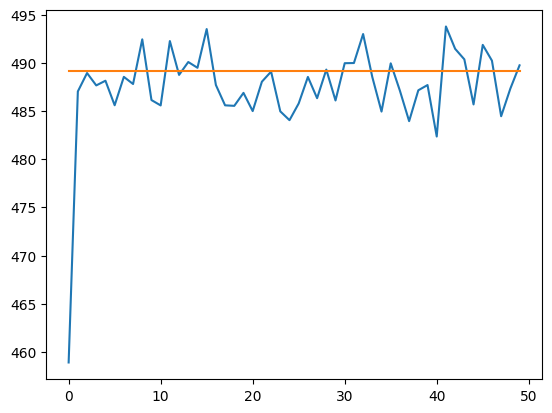

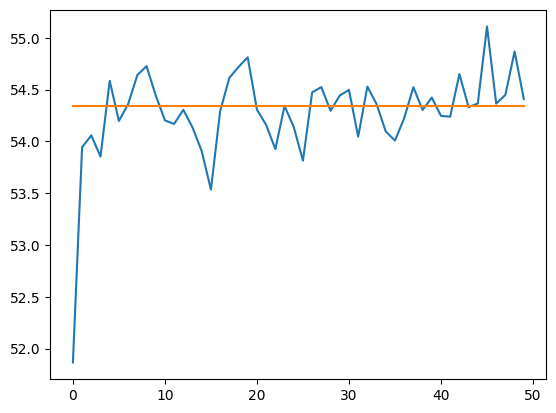

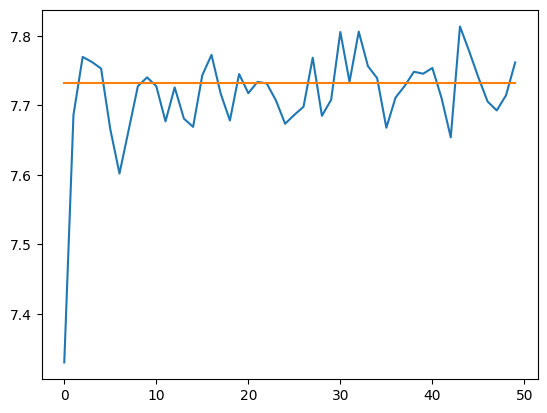

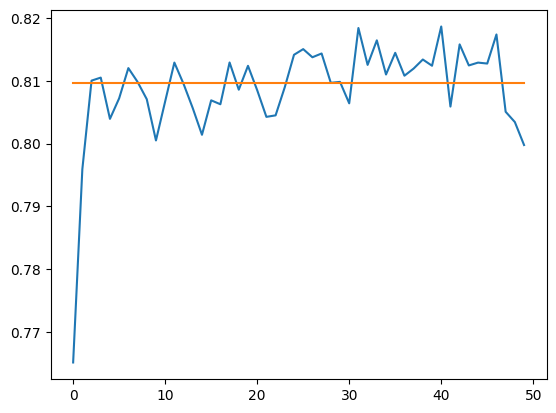

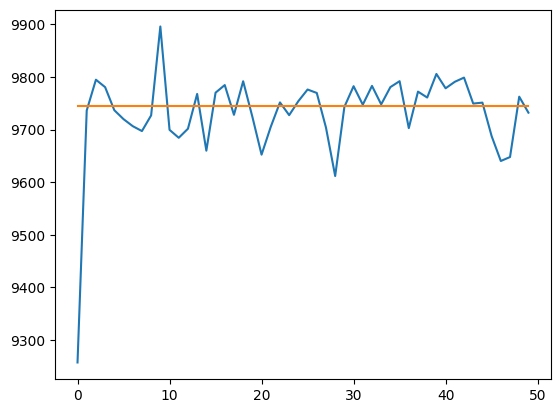

In [7]:
for i in range(0, 5):
    plt.plot(range(0, epochs), D_values[i])
    _ = plt.plot(range(0, epochs), np.full_like(range(0, epochs), true_stake[i], dtype=float))
    plt.show()

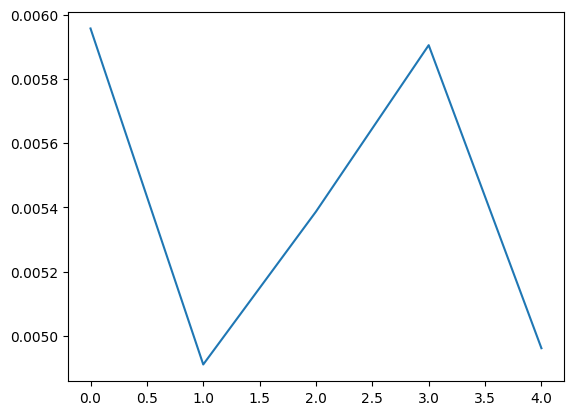

In [8]:
errors = []
for i in range(0, 5):
    errors.append(np.mean(np.abs(D_values[i] - true_stake[i]) / true_stake[i]))
plt.plot(range(0,5), errors)